In [55]:
# 월드컵분석에 쓰인 라이브러리
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import plotly.graph_objects as go


In [56]:
# 데이터
matches = pd.read_csv('C:/Users/dlagh/Desktop/worldcup-prediction/data/results.csv')
worldcup2018 = pd.read_csv('C:/Users/dlagh/Desktop/worldcup-prediction/data/World Cup 2018 Dataset.csv')
worldcupmatches = pd.read_csv('C:/Users/dlagh/Desktop/worldcup-prediction/data/WorldCupMatches.csv')
worldcups = pd.read_csv('C:/Users/dlagh/Desktop/worldcup-prediction/data/WorldCups.csv')
rank = pd.read_csv('C:/Users/dlagh/Desktop/worldcup-prediction/data/fifa_ranking.csv')

In [57]:
#worldcups 데이터
worldcups = pd.read_csv('C:/Users/dlagh/Desktop/worldcup-prediction/data/WorldCups.csv')
worldcups.head(2)

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000


In [58]:
# 역대 월드컵 성적(1~4등까지)
winner = worldcups['Winner']
runners_up = worldcups['Runners-Up']
third = worldcups['Third']
fourth = worldcups['Fourth']
winnercount = pd.Series(winner.value_counts())
runners_upcount = pd.Series(runners_up.value_counts())
thirdcount = pd.Series(third.value_counts())
fourthcount = pd.Series(fourth.value_counts())
ranks = pd.DataFrame({'Winner':winnercount, 'Runners-Up':runners_upcount, 'Third':thirdcount , 'Fourth':fourthcount})

ranks = ranks.fillna(0).astype('int64')

ranks =ranks.sort_values(['Winner','Runners-Up','Third','Fourth'], ascending=False)

ranks.head()



,Winner,Runners-Up,Third,Fourth
Brazil,5,2,2,2
Italy,4,2,1,1
Germany FR,3,3,1,1
Argentina,2,3,0,0
Uruguay,2,0,0,3


<BarContainer object of 25 artists>

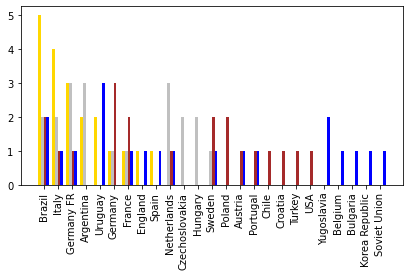

In [59]:
# 역대 월드컵 성적 시각화
x = np.array(list(range(0,len(ranks))))
fig, ax = plt.subplots()

plt.xticks(x,ranks.index, rotation=90)
plt.tight_layout()

ax.bar(x-0.3, ranks['Winner'], color = 'gold', width=0.2 )
ax.bar(x-0.1, ranks['Runners-Up'], color = 'silver', width=0.2)
ax.bar(x+0.1, ranks['Third'], color = 'brown', width=0.2 )
ax.bar(x+0.3, ranks['Fourth'], color = 'blue', width=0.2)

In [60]:
# 나라당 골 수 (대한민국이 1986년부터 현재까지 쭉 월드컵 진출햇기때문에 1986년 이후 월드컵 자료 사용)
worldcupmatches = worldcupmatches[worldcupmatches['Year']>1985] 
home = worldcupmatches[['Home Team Name', 'Home Team Goals']].dropna()
away = worldcupmatches[['Away Team Name', 'Away Team Goals']].dropna()
home.columns = ['Countries', 'Goals']
away.columns = home.columns
goals = home.append(away, ignore_index = True)

C:\Users\dlagh\AppData\Local\Temp\ipykernel_24308\3439562515.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  goals = home.append(away, ignore_index = True)


In [61]:
goals = goals.groupby('Countries').sum()
goals = goals.sort_values(by = 'Goals', ascending=False).reset_index()
goals

,Countries,Goals
0,Brazil,91.0
1,Germany,90.0
2,Argentina,70.0
3,Spain,66.0
4,Netherlands,59.0
...,...,...
68,Bolivia,1.0
69,Korea DPR,1.0
70,China PR,0.0
71,Canada,0.0


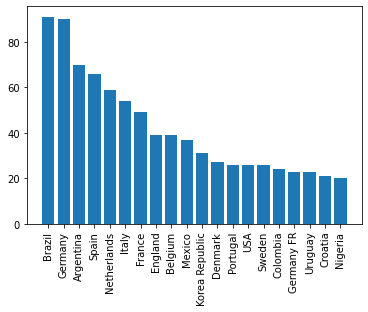

In [62]:
# 나라당 골 수 시각화
x = np.arange(20)
country = goals['Countries'].iloc[0:20]
goal = goals['Goals'].iloc[0:20]

plt.bar(x, goal)
plt.xticks(x, country, rotation=90)

plt.show()

In [1]:
#H조에 속한 나라들의 골 수
H_group =goals[(goals['Countries']=='Korea Republic') | (goals['Countries']=='Portugal') | (goals['Countries']=='Ghana') | (goals['Countries']=='Uruguay') ]

H_group=H_group.reset_index()


NameError: name 'goals' is not defined

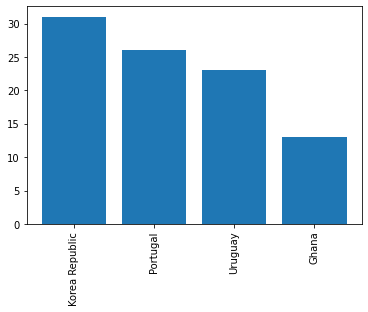

In [64]:
#H조에 속한 나라들의 골 수 시각화
x = np.arange(4)
country = H_group['Countries']
goal = H_group['Goals']

plt.bar(x, goal)
plt.xticks(x, country, rotation=90)

plt.show()

In [65]:
# 홈앤드 어웨이 성적 지표
def get_labels(worldcupmatches):
    if worldcupmatches['Home Team Goals'] > worldcupmatches['Away Team Goals']:
        return 'Home Team Win'
    if worldcupmatches['Home Team Goals'] < worldcupmatches['Away Team Goals']:
        return 'Away Team Win'
    return 'DRAW'

In [66]:
worldcupmatches['outcome'] = worldcupmatches.apply(lambda x: get_labels(x), axis=1)
worldcupmatches.head(2)

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,...,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials,outcome
360,1986.0,31 May 1986 - 12:00,Group A,Estadio Azteca,Mexico City,Bulgaria,1.0,1.0,Italy,,...,0.0,1.0,FREDRIKSSON Erik (SWE),CODESAL MENDEZ Edgardo (MEX),ROTH Volker (GER),308.0,459.0,BUL,ITA,DRAW
361,1986.0,01 Jun 1986 - 16:00,Group C,Nou Camp - Estadio Le�n,Leon,Canada,0.0,1.0,France,,...,0.0,0.0,SILVA ARCE Hernan (CHI),MENDEZ MOLINA Romulo (GUA),ULLOA MORERA Berny (CRC),308.0,468.0,CAN,FRA,Away Team Win


In [67]:
mt = worldcupmatches['outcome'].value_counts()
mt

Home Team Win    221
Away Team Win    151
DRAW             120
Name: outcome, dtype: int64

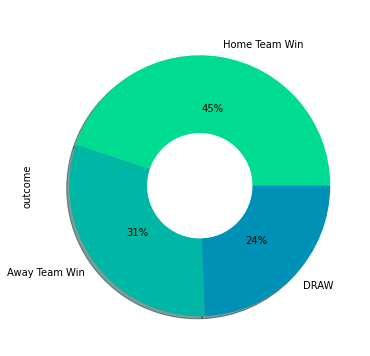

In [68]:
plt.figure(figsize = (6,6))

mt.plot.pie(autopct = "%1.0f%%", colors = sns.color_palette('winter_r'), shadow = True)

c = plt.Circle((0,0), 0.4, color =  'white')
plt.gca().add_artist(c)
plt.title('Match Outcomes by Home and Away Teams' , color = 'white')
plt.show()

In [69]:
#한국팀 홈앤어웨이 지표
komatch_home = worldcupmatches[worldcupmatches['Home Team Name']=='Korea Republic']
komatch_away = worldcupmatches[worldcupmatches['Away Team Name']=='Korea Republic']
komatch= komatch_home.append(komatch_away, ignore_index = True)
total_komatch = len(komatch)

C:\Users\dlagh\AppData\Local\Temp\ipykernel_24308\1892514053.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  komatch= komatch_home.append(komatch_away, ignore_index = True)


In [70]:
komatch_home= komatch_home[komatch_home['outcome']=='Home Team Win']
komatch_away= komatch_away[komatch_away['outcome']=='Away Team Win']
komatch_draw =komatch[(komatch['Away Team Name']=='Korea Republic') | (komatch['Home Team Name']=='Korea Republic')]
komatch_draw= komatch_draw[komatch_draw['outcome']=='DRAW']


In [71]:
komatch= komatch_home.append([komatch_away,komatch_draw] ,ignore_index = True)

C:\Users\dlagh\AppData\Local\Temp\ipykernel_24308\661287634.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  komatch= komatch_home.append([komatch_away,komatch_draw] ,ignore_index = True)


In [72]:
komt = komatch['outcome'].value_counts()
komt_pd=pd.DataFrame(komt)
komt_pd = komt_pd.reset_index()
# 스페인전 draw로 기록됨 4강전 away가 한국
komt_pd.iloc[0,1] =7 
komt_pd.iloc[2,1] =2 

# 월드컵에서의 승률
win_po =komt_pd.iloc[1,1] + komt_pd.iloc[2,1]
win_rate = win_po/ total_komatch 
win_rate

komt_pd

print(win_rate)

0.20689655172413793


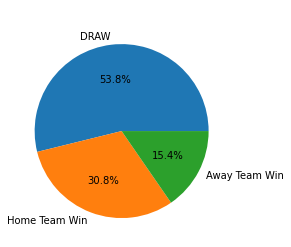

In [73]:
ratio = komt_pd['outcome']
labels = komt_pd['index']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.title('Match Outcomes(world_cup)' , color = 'white')
plt.show()

In [74]:
# 포르투갈 홈엔어웨이
pomatch_home = worldcupmatches[worldcupmatches['Home Team Name']=='Portugal']
pomatch_away = worldcupmatches[worldcupmatches['Away Team Name']=='Portugal']
pomatch= pomatch_home.append(pomatch_away, ignore_index = True)
total_pomatch = len(pomatch)
pomatch_home= pomatch_home[pomatch_home['outcome']=='Home Team Win']
pomatch_away= pomatch_away[pomatch_away['outcome']=='Away Team Win']
pomatch_draw =pomatch[(pomatch['Away Team Name']=='Portugal') | (pomatch['Home Team Name']=='Portugal')]
pomatch_draw= pomatch_draw[pomatch_draw['outcome']=='DRAW']
pomatch= pomatch_home.append([pomatch_away,pomatch_draw] ,ignore_index = True)

C:\Users\dlagh\AppData\Local\Temp\ipykernel_24308\920061994.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pomatch= pomatch_home.append(pomatch_away, ignore_index = True)
C:\Users\dlagh\AppData\Local\Temp\ipykernel_24308\920061994.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pomatch= pomatch_home.append([pomatch_away,pomatch_draw] ,ignore_index = True)


In [75]:
pomt = pomatch['outcome'].value_counts()
pomt_pd=pd.DataFrame(pomt)
pomt_pd = pomt_pd.reset_index()
win_po =pomt_pd.iloc[0,1] + pomt_pd.iloc[2,1]
win_rate = win_po/ total_pomatch 
win_rate

0.4

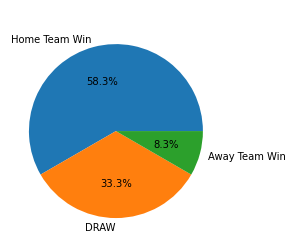

In [76]:
ratio = pomt_pd['outcome']
labels = pomt_pd['index']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.title('Match Outcomes(world_cup)' , color = 'white')
plt.show()

In [77]:
# 가나 홈엔어웨이
ghamatch_home = worldcupmatches[worldcupmatches['Home Team Name']=='Ghana']
ghamatch_away = worldcupmatches[worldcupmatches['Away Team Name']=='Ghana']
ghamatch= ghamatch_home.append(ghamatch_away, ignore_index = True)
total_ghamatch = len(ghamatch)
ghamatch_home= ghamatch_home[ghamatch_home['outcome']=='Home Team Win']
ghamatch_away= ghamatch_away[ghamatch_away['outcome']=='Away Team Win']
ghamatch_draw =ghamatch[(ghamatch['Away Team Name']=='Ghana') | (ghamatch['Home Team Name']=='Ghana')]
ghamatch_draw= ghamatch_draw[ghamatch_draw['outcome']=='DRAW']
ghamatch= ghamatch_home.append([ghamatch_away,ghamatch_draw] ,ignore_index = True)

C:\Users\dlagh\AppData\Local\Temp\ipykernel_24308\2163084458.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ghamatch= ghamatch_home.append(ghamatch_away, ignore_index = True)
C:\Users\dlagh\AppData\Local\Temp\ipykernel_24308\2163084458.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ghamatch= ghamatch_home.append([ghamatch_away,ghamatch_draw] ,ignore_index = True)


In [78]:
ghamt = ghamatch['outcome'].value_counts()
ghamt_pd=pd.DataFrame(ghamt)
ghamt_pd = ghamt_pd.reset_index()
win_gha =ghamt_pd.iloc[0,1] + ghamt_pd.iloc[2,1]
win_rate = win_gha/ total_ghamatch 
win_rate

0.3333333333333333

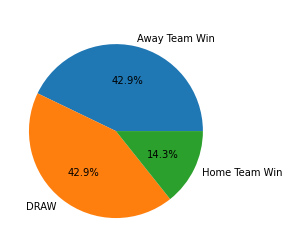

In [79]:
ratio = ghamt_pd['outcome']
labels = ghamt_pd['index']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.title('Match Outcomes(world_cup)' , color = 'white')
plt.show()

In [80]:
# 우루과이 홈엔어웨이
urumatch_home = worldcupmatches[worldcupmatches['Home Team Name']=='Uruguay']
urumatch_away = worldcupmatches[worldcupmatches['Away Team Name']=='Uruguay']
urumatch= urumatch_home.append(urumatch_away, ignore_index = True)
total_urumatch = len(urumatch)
urumatch_home= urumatch_home[urumatch_home['outcome']=='Home Team Win']
urumatch_away= urumatch_away[urumatch_away['outcome']=='Away Team Win']
urumatch_draw =urumatch[(urumatch['Away Team Name']=='Uruguay') | (urumatch['Home Team Name']=='Uruguay')]
urumatch_draw= urumatch_draw[urumatch_draw['outcome']=='DRAW']
urumatch= urumatch_home.append([urumatch_away,urumatch_draw] ,ignore_index = True)

C:\Users\dlagh\AppData\Local\Temp\ipykernel_24308\3275687037.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  urumatch= urumatch_home.append(urumatch_away, ignore_index = True)
C:\Users\dlagh\AppData\Local\Temp\ipykernel_24308\3275687037.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  urumatch= urumatch_home.append([urumatch_away,urumatch_draw] ,ignore_index = True)


In [81]:
urumt = urumatch['outcome'].value_counts()
urumt_pd=pd.DataFrame(urumt)
urumt_pd = urumt_pd.reset_index()
win_uru =urumt_pd.iloc[0,1] + urumt_pd.iloc[2,1]
win_rate = win_uru/ total_urumatch 
win_rate

0.391304347826087

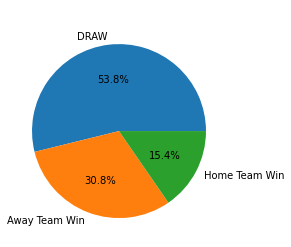

In [82]:
ratio = urumt_pd['outcome']
labels = urumt_pd['index']

plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.title('Match Outcomes(world_cup)' , color = 'white')
plt.show()

In [84]:
country = worldcup2018['Team'].unique()
country

array(['Russia', 'Saudi Arabia', 'Egypt', 'Uruguay', 'Porugal', 'Spain',
       'Morocco', 'IRAN', 'France', 'Australia', 'Peru', 'Denmark',
       'Argentina', 'Iceland', 'Croatia', 'Nigeria', 'Brazil',
       'Switzerland', 'Costarica', 'Serbia', 'Germany', 'Mexico',
       'Sweden', 'Korea', 'Belgium', 'Panama', 'Tunisia', 'England',
       'Poland', 'Senegal', 'Columbia', 'Japan', nan], dtype=object)

In [85]:
country_name = matches['home_team'].unique()
country_name

array(['Scotland', 'England', 'Wales', 'Northern Ireland',
       'United States', 'Uruguay', 'Austria', 'Hungary', 'Argentina',
       'Belgium', 'France', 'Netherlands', 'Czechoslovakia',
       'Switzerland', 'Sweden', 'Germany', 'Italy', 'Chile', 'Norway',
       'Finland', 'Luxembourg', 'Russia', 'Denmark', 'Catalonia',
       'Basque Country', 'Brazil', 'Japan', 'Paraguay', 'Canada',
       'Estonia', 'Costa Rica', 'Guatemala', 'Spain', 'Brittany',
       'Poland', 'Yugoslavia', 'New Zealand', 'Romania', 'Latvia',
       'Galicia', 'Portugal', 'Andalusia', 'China PR', 'Australia',
       'Lithuania', 'Turkey', 'Central Spain', 'Mexico', 'Aruba', 'Egypt',
       'Haiti', 'Philippines', 'Bulgaria', 'Jamaica', 'Kenya', 'Bolivia',
       'Peru', 'Honduras', 'Guyana', 'Uganda', 'Belarus', 'El Salvador',
       'Barbados', 'Republic of Ireland', 'Trinidad and Tobago', 'Greece',
       'Curaçao', 'Dominica', 'Silesia', 'Guadeloupe', 'Israel',
       'Suriname', 'French Guiana', 'Cuba', 

In [86]:
country=country.tolist()
country_name=country_name.tolist()

In [87]:
# 이름이 다른 값 찾기
for i in country_name:
    if i in country:
        country.remove(i)
print(country)

['Porugal', 'IRAN', 'Costarica', 'Korea', 'Columbia', nan]


In [88]:
# 'Portugal','Iran','Costa Rica','Korea Republic','Colombia'
worldcup2018 = worldcup2018.replace({'Porugal':'Portugal', 'IRAN':'Iran','Costarica':'Costa Rica','Columbia':'Colombia','Korea':'South Korea'})
worldcup2018 = worldcup2018.set_index("Team")


In [89]:
#승리팀 컬럼 추가 
winner = []
for i in range (len(matches['home_team'])):
    if matches ['home_score'][i] > matches['away_score'][i]:
        winner.append(matches['home_team'][i])
    elif matches['home_score'][i] < matches ['away_score'][i]:
        winner.append(matches['away_team'][i])
    else:
        winner.append('Draw')
matches['winning_team'] = winner

# 골 득실차
matches['goal_difference'] = abs(matches['home_score'] - matches['away_score'])

matches.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,Draw,0
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,England,2
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,Scotland,1
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,Draw,0
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,Scotland,3


In [90]:
df = matches[(matches['home_team'] == 'South Korea') | (matches['away_team'] == 'South Korea')]
korea = df.iloc[:]
korea.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
2928,1949-01-02,China PR,South Korea,3,2,Friendly,So Kon Po,Hong Kong,True,China PR,1
2930,1949-01-16,Vietnam,South Korea,3,3,Friendly,Saigon,Vietnam,False,Draw,0
2931,1949-01-25,Macau,South Korea,1,5,Friendly,Macau,Macau,False,South Korea,4
3101,1950-04-16,South Korea,Taiwan,3,1,Friendly,Wan Chai,Hong Kong,True,South Korea,2
3475,1953-04-05,Hong Kong,South Korea,4,0,Friendly,So Kon Po,Hong Kong,False,Hong Kong,4


In [91]:
year = []
for row in korea['date']:
    year.append(int(row[:4]))
korea ['match_year']= year
korea_2020 = korea[korea.match_year >= 2015]
korea_2020.count()

date               98
home_team          98
away_team          98
home_score         98
away_score         98
tournament         98
city               98
country            98
neutral            98
winning_team       98
goal_difference    98
match_year         98
dtype: int64

<AxesSubplot:xlabel='korea_game_history', ylabel='count'>

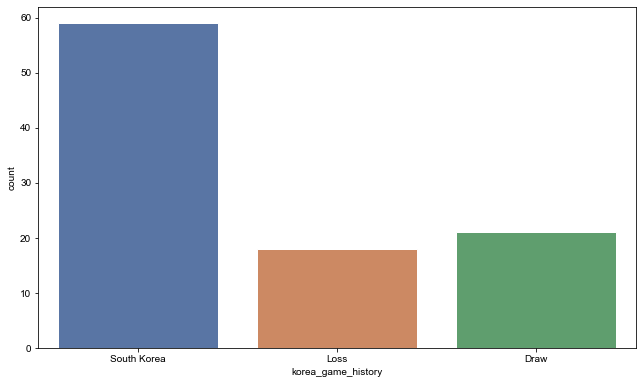

In [92]:
# 2015년 이후 국제대회성적
wins = []
for row in korea_2020['winning_team']:
    if row != 'South Korea' and row != 'Draw':
        wins.append('Loss')
    else:
        wins.append(row)
winsdf= pd.DataFrame(wins, columns=['korea_game_history'])

#plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='korea_game_history', data=winsdf)

In [93]:
# 피파랭킹 50등까지 찾기
rank = pd.read_csv('C:/Users/dlagh/Desktop/worldcup-prediction/data/fifa_ranking.csv')
rank_df = pd.pivot_table(data = rank, 
                            values = 'total_points',
                            index = 'country_full',
                            columns = 'rank_date').fillna(0.0)
rank_df.head()
rank_df['2021-05-27'].sort_values(ascending = False)[:50].index

Index(['Belgium', 'France', 'Brazil', 'England', 'Portugal', 'Spain', 'Italy',
       'Argentina', 'Uruguay', 'Denmark', 'Mexico', 'Germany', 'Switzerland',
       'Croatia', 'Colombia', 'Netherlands', 'Wales', 'Chile', 'Sweden', 'USA',
       'Poland', 'Senegal', 'Austria', 'Ukraine', 'Serbia', 'Tunisia', 'Peru',
       'Japan', 'Turkey', 'Venezuela', 'IR Iran', 'Nigeria', 'Algeria',
       'Morocco', 'Paraguay', 'Slovakia', 'Hungary', 'Russia',
       'Korea Republic', 'Czech Republic', 'Australia', 'Norway', 'Romania',
       'Scotland', 'Jamaica', 'Egypt', 'Republic of Ireland', 'Ghana',
       'Northern Ireland', 'Costa Rica'],
      dtype='object', name='country_full')

In [94]:
FIFA_RAKING =['Belgium', 'France', 'Brazil', 'England', 'Portugal', 'Spain', 'Italy',
'Argentina', 'Uruguay', 'Denmark', 'Mexico', 'Germany', 'Switzerland',
'Croatia', 'Colombia', 'Netherlands', 'Wales', 'Chile', 'Sweden', 'USA',
'Poland', 'Senegal', 'Austria', 'Ukraine', 'Serbia', 'Tunisia', 'Peru',
'Japan', 'Turkey', 'Venezuela', 'IR Iran', 'Nigeria', 'Algeria',
'Morocco', 'Paraguay', 'Slovakia', 'Hungary', 'Russia',
'Korea Republic', 'Czech Republic', 'Australia', 'Norway', 'Romania',
'Scotland', 'Jamaica', 'Egypt', 'Republic of Ireland',
'Northern Ireland', 'Ghana', 'Costa Rica']
result=pd.DataFrame()
for i in FIFA_RAKING:
    a=i
    fifadf = matches[(matches['home_team'] == a) | (matches['away_team'] == a)]
    result = pd.concat([result,fifadf])
print(result)

             date    home_team      away_team  home_score  away_score  \
163    1904-05-01      Belgium         France           3           3   
174    1905-04-30      Belgium    Netherlands           1           4   
175    1905-05-07      Belgium         France           7           0   
176    1905-05-14  Netherlands        Belgium           4           0   
185    1906-04-22       France        Belgium           0           5   
...           ...          ...            ...         ...         ...   
43237  2022-01-30       Mexico     Costa Rica           0           0   
43258  2022-02-02      Jamaica     Costa Rica           0           1   
43282  2022-03-24   Costa Rica         Canada           1           0   
43347  2022-03-27  El Salvador     Costa Rica           1           2   
43417  2022-03-30   Costa Rica  United States           2           0   

                         tournament          city      country  neutral  \
163                        Friendly      Brussel

In [95]:
df2 = result[(result['home_team'] == 'South Korea') | (result['away_team'] == 'South Korea')]
korea2 = df2.iloc[:]
korea2

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
16257,1990-06-12,Belgium,South Korea,2,0,FIFA World Cup,Verona,Italy,True,Belgium,2
21518,1998-06-25,Belgium,South Korea,1,1,FIFA World Cup,Paris,France,True,Draw,0
22165,1999-06-05,South Korea,Belgium,1,2,Friendly,Seoul,South Korea,False,Belgium,1
36316,2014-06-26,South Korea,Belgium,0,1,FIFA World Cup,São Paulo,Brazil,True,Belgium,1
24136,2001-05-30,South Korea,France,0,5,Confederations Cup,Daegu,South Korea,False,France,5
...,...,...,...,...,...,...,...,...,...,...,...
24901,2002-04-21,South Korea,Costa Rica,2,0,Friendly,Daegu,South Korea,False,South Korea,2
28290,2006-02-11,Costa Rica,South Korea,1,0,Friendly,Oakland,United States,True,Costa Rica,1
35990,2014-01-25,Costa Rica,South Korea,0,1,Friendly,Los Angeles,United States,True,South Korea,1
36608,2014-10-14,South Korea,Costa Rica,1,3,Friendly,Seoul,South Korea,False,Costa Rica,2


<AxesSubplot:xlabel='korea_game_history', ylabel='count'>

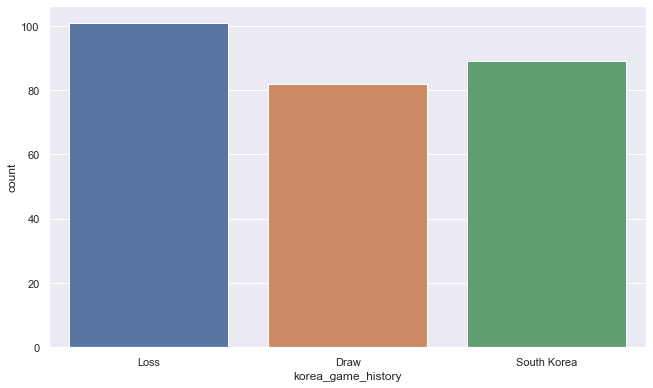

In [96]:
#2015년 이후 1위에서 50위팀 상대로의 국제 대회 성적
wins = []
for row in korea2['winning_team']:
    if row != 'South Korea' and row != 'Draw':
        wins.append('Loss')
    else:
        wins.append(row)
winsdf= pd.DataFrame(wins, columns=['korea_game_history'])

#plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='korea_game_history', data=winsdf)

In [97]:
podf2 = result[(result['home_team'] == 'Portugal') | (result['away_team'] == 'Portugal')]
Portugal = podf2.iloc[:]
Portugal

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
1302,1930-06-08,Belgium,Portugal,2,1,Friendly,Antwerp,Belgium,False,Belgium,1
1408,1931-05-31,Portugal,Belgium,3,2,Friendly,Lisbon,Portugal,False,Portugal,1
3253,1951-06-17,Portugal,Belgium,1,1,Friendly,Oeiras,Portugal,False,Draw,0
3613,1954-03-14,Belgium,Portugal,0,0,Friendly,Brussels,Belgium,False,Draw,0
5128,1962-05-17,Portugal,Belgium,1,2,Friendly,Lisbon,Portugal,False,Belgium,1
...,...,...,...,...,...,...,...,...,...,...,...
21052,1997-10-11,Portugal,Northern Ireland,1,0,FIFA World Cup qualification,Lisbon,Portugal,False,Portugal,1
28132,2005-11-15,Northern Ireland,Portugal,1,1,Friendly,Belfast,Northern Ireland,False,Draw,0
34768,2012-10-16,Portugal,Northern Ireland,1,1,FIFA World Cup qualification,Porto,Portugal,False,Draw,0
35631,2013-09-06,Northern Ireland,Portugal,2,4,FIFA World Cup qualification,Belfast,Northern Ireland,False,Portugal,2


<AxesSubplot:xlabel='Portugal_game_history', ylabel='count'>

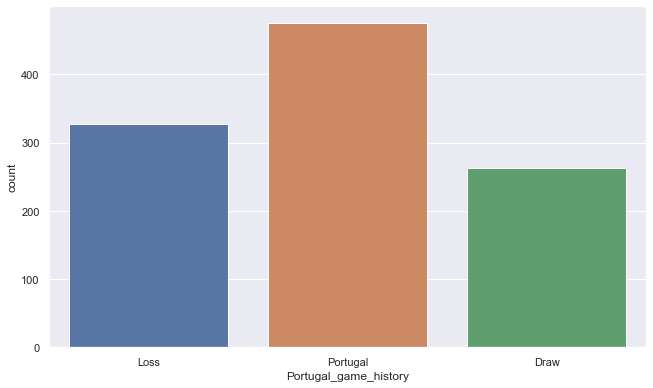

In [98]:
wins = []
for row in Portugal['winning_team']:
    if row != 'Portugal' and row != 'Draw':
        wins.append('Loss')
    else:
        wins.append(row)
winsdf= pd.DataFrame(wins, columns=['Portugal_game_history'])

#plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Portugal_game_history', data=winsdf)

<AxesSubplot:xlabel='Ghana_game_history', ylabel='count'>

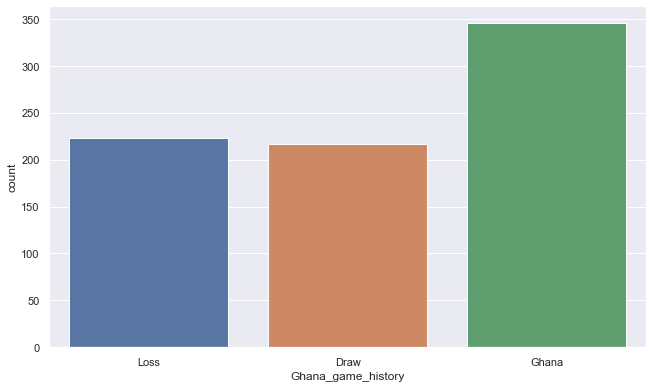

In [99]:
ghadf2 = result[(result['home_team'] == 'Ghana') | (result['away_team'] == 'Ghana')]
Ghana = ghadf2.iloc[:]
Ghana
wins = []
for row in Ghana['winning_team']:
    if row != 'Ghana' and row != 'Draw':
        wins.append('Loss')
    else:
        wins.append(row)
winsdf= pd.DataFrame(wins, columns=['Ghana_game_history'])

#plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Ghana_game_history', data=winsdf)

<AxesSubplot:xlabel='Uruguay_game_history', ylabel='count'>

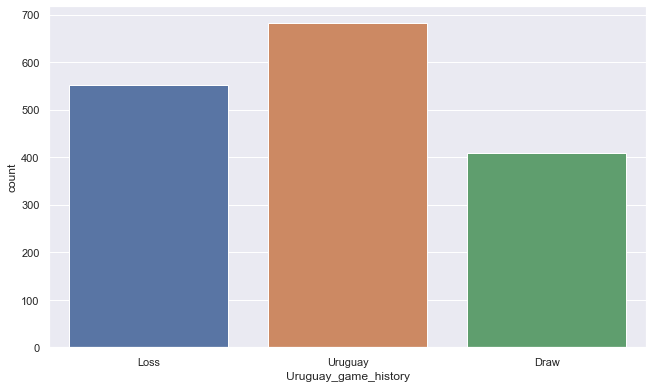

In [100]:
urudf2 = result[(result['home_team'] == 'Uruguay') | (result['away_team'] == 'Uruguay')]
Uruguay = urudf2.iloc[:]
Uruguay
wins = []
for row in Uruguay['winning_team']:
    if row != 'Uruguay' and row != 'Draw':
        wins.append('Loss')
    else:
        wins.append(row)
winsdf= pd.DataFrame(wins, columns=['Uruguay_game_history'])

#plotting
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sns.set(style='darkgrid')
sns.countplot(x='Uruguay_game_history', data=winsdf)

In [101]:
# 포르투갈 상대전적

H_TEAM =['Portugal','Uruguay','Korea Republic', 'Ghana']

poko1 = matches[(matches['home_team'] == 'South Korea') & (matches['away_team'] == 'Portugal')]
poko2 = matches[(matches['home_team'] == 'Portugal') & (matches['away_team'] == 'South Korea')]
poko = pd.concat([poko1,poko2])
poko

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
25016,2002-06-14,South Korea,Portugal,1,0,FIFA World Cup,Incheon,South Korea,False,South Korea,1


In [102]:
# 가나 상대전적
ghako1 = matches[(matches['home_team'] == 'South Korea') & (matches['away_team'] == 'Ghana')]
ghako2 = matches[(matches['home_team'] == 'Ghana') & (matches['away_team'] == 'South Korea')]
ghako = pd.concat([ghako1,ghako2])
ghako

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
12799,1983-06-15,South Korea,Ghana,1,0,Korea Cup,Seoul,South Korea,False,South Korea,1
20751,1997-06-14,South Korea,Ghana,3,0,Korea Cup,Suwon,South Korea,False,South Korea,3
28861,2006-10-08,South Korea,Ghana,1,3,Friendly,Seoul,South Korea,False,Ghana,2
33241,2011-06-07,South Korea,Ghana,2,1,Friendly,Jeonju,South Korea,False,South Korea,1
28518,2006-06-04,Ghana,South Korea,3,1,Friendly,Edinburgh,Scotland,True,Ghana,2
36265,2014-06-09,Ghana,South Korea,4,0,Friendly,Miami Gardens,United States,True,Ghana,4


In [103]:
# 우루과이 상대전적
uruko1 = matches[(matches['home_team'] == 'South Korea') & (matches['away_team'] == 'Uruguay')]
uruko2 = matches[(matches['home_team'] == 'Uruguay') & (matches['away_team'] == 'South Korea')]
uruko = pd.concat([uruko1,uruko2])
uruko

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_difference
12297,1982-02-20,South Korea,Uruguay,2,2,Nehru Cup,Calcutta,India,True,Draw,0
16283,1990-06-21,South Korea,Uruguay,0,1,FIFA World Cup,Udine,Italy,True,Uruguay,1
25779,2003-06-08,South Korea,Uruguay,0,2,Friendly,Seoul,South Korea,False,Uruguay,2
29210,2007-03-24,South Korea,Uruguay,0,2,Friendly,Seoul,South Korea,False,Uruguay,2
36458,2014-09-08,South Korea,Uruguay,0,1,Friendly,Goyang,South Korea,False,Uruguay,1
40324,2018-10-12,South Korea,Uruguay,2,1,Friendly,Seoul,South Korea,False,South Korea,1
24799,2002-02-13,Uruguay,South Korea,2,1,Friendly,Montevideo,Uruguay,False,Uruguay,1
32366,2010-06-26,Uruguay,South Korea,2,1,FIFA World Cup,Port Elizabeth,South Africa,True,Uruguay,1


In [104]:
rank = pd.read_csv('C:/Users/dlagh/Desktop/worldcup-prediction/data/fifa_ranking.csv')
rank = rank[rank['rank_date'] >= '2001-12-22']

In [105]:
rank_df = pd.pivot_table(data = rank, 
                            values = 'total_points',
                            index = 'country_full',
                            columns = 'rank_date').fillna(0.0)
rank_df.head()

rank_date,2002-01-16,2002-02-13,2002-03-20,2002-04-17,2002-05-15,2002-07-03,2002-08-14,2002-09-18,2002-10-23,2002-11-20,...,2020-04-09,2020-06-11,2020-07-16,2020-09-17,2020-10-22,2020-11-26,2020-12-10,2021-02-18,2021-04-07,2021-05-27
country_full,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1052.0,1052.0,1052.0,1052.0,1052.0,1052.0,1052.0,1052.0,1052.0,1052.0
Albania,457.0,452.0,449.0,453.0,442.0,437.0,432.0,427.0,434.0,432.0,...,1356.0,1356.0,1356.0,1351.0,1345.0,1360.0,1360.0,1360.0,1362.0,1362.0
Algeria,511.0,510.0,507.0,503.0,497.0,490.0,481.0,495.0,507.0,506.0,...,1482.0,1482.0,1482.0,1482.0,1489.0,1488.0,1488.0,1488.0,1486.0,1486.0
American Samoa,16.0,16.0,20.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,...,900.0,900.0,900.0,900.0,900.0,900.0,900.0,900.0,900.0,900.0
Andorra,274.0,274.0,272.0,272.0,286.0,286.0,286.0,285.0,303.0,303.0,...,1082.0,1082.0,1082.0,1076.0,1065.0,1048.0,1048.0,1048.0,1034.0,1034.0


In [106]:
best_ranks = rank_df.loc[rank_df['2021-05-27'].sort_values(ascending = False)[:5].index]
best_ranks

rank_date,2002-01-16,2002-02-13,2002-03-20,2002-04-17,2002-05-15,2002-07-03,2002-08-14,2002-09-18,2002-10-23,2002-11-20,...,2020-04-09,2020-06-11,2020-07-16,2020-09-17,2020-10-22,2020-11-26,2020-12-10,2021-02-18,2021-04-07,2021-05-27
country_full,,,,,,,,,,,,,,,,,,,,,
Belgium,666.0,664.0,665.0,657.0,653.0,678.0,677.0,672.0,688.0,682.0,...,1765.0,1765.0,1765.0,1773.0,1765.0,1780.0,1780.0,1780.0,1783.0,1783.0
France,812.0,809.0,807.0,810.0,802.0,784.0,772.0,774.0,790.0,787.0,...,1733.0,1733.0,1733.0,1744.0,1752.0,1755.0,1755.0,1755.0,1757.0,1757.0
Brazil,793.0,791.0,788.0,787.0,784.0,852.0,859.0,858.0,855.0,857.0,...,1712.0,1712.0,1712.0,1712.0,1725.0,1743.0,1743.0,1743.0,1742.0,1742.0
England,712.0,709.0,704.0,698.0,694.0,728.0,728.0,718.0,731.0,734.0,...,1661.0,1661.0,1661.0,1664.0,1669.0,1670.0,1670.0,1670.0,1686.0,1686.0
Portugal,741.0,738.0,733.0,726.0,726.0,731.0,728.0,712.0,713.0,709.0,...,1639.0,1639.0,1639.0,1653.0,1661.0,1662.0,1662.0,1662.0,1666.0,1666.0


In [107]:
best_ranks = rank_df.loc[rank_df['2021-05-27'].sort_values(ascending = False)[:5].index ]
fig = go.Figure()

for i in range(len(best_ranks.values)):
    fig.add_trace(go.Scatter(x = best_ranks.columns, 
                             y = best_ranks.iloc[i],
                             name = best_ranks.index[i]))
    
fig.update_layout(
    title="FIFA Ranking today's 5 best teams",
    yaxis_title="Points"
)
fig.show()

In [108]:
ranking=rank_df[(rank_df.index == 'Ghana') | (rank_df.index == 'Portugal') | (rank_df.index == 'Korea Republic') | (rank_df.index == 'Uruguay')]
ranking

rank_date,2002-01-16,2002-02-13,2002-03-20,2002-04-17,2002-05-15,2002-07-03,2002-08-14,2002-09-18,2002-10-23,2002-11-20,...,2020-04-09,2020-06-11,2020-07-16,2020-09-17,2020-10-22,2020-11-26,2020-12-10,2021-02-18,2021-04-07,2021-05-27
country_full,,,,,,,,,,,,,,,,,,,,,
Ghana,549.0,564.0,566.0,558.0,558.0,537.0,529.0,522.0,535.0,529.0,...,1439.0,1439.0,1439.0,1439.0,1438.0,1424.0,1424.0,1424.0,1425.0,1425.0
Korea Republic,599.0,602.0,599.0,602.0,603.0,664.0,663.0,667.0,667.0,671.0,...,1464.0,1464.0,1464.0,1464.0,1464.0,1465.0,1465.0,1465.0,1460.0,1460.0
Portugal,741.0,738.0,733.0,726.0,726.0,731.0,728.0,712.0,713.0,709.0,...,1639.0,1639.0,1639.0,1653.0,1661.0,1662.0,1662.0,1662.0,1666.0,1666.0
Uruguay,664.0,662.0,661.0,660.0,652.0,662.0,657.0,655.0,653.0,653.0,...,1645.0,1645.0,1645.0,1645.0,1637.0,1639.0,1639.0,1639.0,1639.0,1639.0


In [109]:
fig = go.Figure()

for i in range(len(ranking.values)):
    fig.add_trace(go.Scatter(x = ranking.columns, 
                             y = ranking.iloc[i],
                             name = ranking.index[i]))
    
fig.update_layout(
    title="FIFA Ranking H조",
    yaxis_title="Points"
)
fig.show()

In [1]:
import pandas as pd
timeset = pd.read_csv('C:/Users/dlagh/Desktop/worldcup-prediction/data/WorldCups_time.csv')
print(timeset)

    year       Country                       open_time     Winner  \
0   1930       Uruguay              America/Montevideo    Uruguay   
1   1934         Italy                     Europe/Rome      Italy   
2   1938        France                    Europe/Paris      Italy   
3   1950        Brazil               America/Sao_Paulo    Uruguay   
4   1954   Switzerland                   Europe/Zurich    Germany   
5   1958        Sweden                Europe/Stockholm     Brazil   
6   1962         Chile                America/Santiago     Brazil   
7   1966       England                   Europe/London    England   
8   1970        Mexico             America/Mexico_City     Brazil   
9   1974       Germany                   Europe/Berlin    Germany   
10  1978     Argentina  America/Argentina/Buenos_Aires  Argentina   
11  1982         Spain                   Europe/Madrid      Italy   
12  1986        Mexico             America/Mexico_City  Argentina   
13  1990         Italy            

In [2]:
from pytz import timezone
from datetime import datetime

timez0 = []
timez1 = []
timez2 = []
timez3 = []
timez4 = []


for i in timeset['open_time']:
    timeZ0 = int(str(datetime.now(timezone(i)))[-5:-3])+int(str(datetime.now(timezone(i)))[-2:])/60
    timez0.append(timeZ0)
    
for j in timeset['time1']:
    timeZ1 = int(str(datetime.now(timezone(j)))[-5:-3])+int(str(datetime.now(timezone(j)))[-2:])/60
    timez1.append(timeZ1)    

for k in timeset['time2']:
    timeZ2 = int(str(datetime.now(timezone(k)))[-5:-3])+int(str(datetime.now(timezone(k)))[-2:])/60
    timez2.append(timeZ2)
    
for l in timeset['time3']:
    timeZ3 = int(str(datetime.now(timezone(l)))[-5:-3])+int(str(datetime.now(timezone(l)))[-2:])/60
    timez3.append(timeZ3)
    
for m in timeset['time4']:
    timeZ4 = int(str(datetime.now(timezone(m)))[-5:-3])+int(str(datetime.now(timezone(m)))[-2:])/60
    timez4.append(timeZ4)
    

timez0 = pd.DataFrame(timez0, columns = ['timeZ0'])
timez1 = pd.DataFrame(timez1, columns = ['timeZ1'])
timez2 = pd.DataFrame(timez2, columns = ['timeZ2'])
timez3 = pd.DataFrame(timez3, columns = ['timeZ3'])
timez4 = pd.DataFrame(timez4, columns = ['timeZ4'])
timeset2 = pd.concat([timeset, timez0, timez1, timez2, timez3, timez4],axis=1)

In [3]:
timeset2['timedif1'] = timeset2['timeZ0']-timeset2['timeZ1']
timeset2['timedif2'] = timeset2['timeZ0']-timeset2['timeZ2']
timeset2['timedif3'] = timeset2['timeZ0']-timeset2['timeZ3']
timeset2['timedif4'] = timeset2['timeZ0']-timeset2['timeZ4']

In [4]:
timeset2 = timeset2.rename(columns={'Unnamed: 0': 'year'})
timeset2.set_index('year')

,Country,open_time,Winner,time1,Runners-Up,time2,Third,time3,Fourth,time4,...,Attendance,timeZ0,timeZ1,timeZ2,timeZ3,timeZ4,timedif1,timedif2,timedif3,timedif4
year,,,,,,,,,,,,,,,,,,,,,
1930,Uruguay,America/Montevideo,Uruguay,America/Montevideo,Argentina,America/Argentina/Buenos_Aires,USA,America/New_York,Yugoslavia,Europe/Belgrade,...,590.549,3.0,3.0,3.0,4.0,2.0,0.0,0.0,-1.0,1.0
1934,Italy,Europe/Rome,Italy,Europe/Rome,Czechoslovakia,Europe/Prague,Germany,Europe/Berlin,Austria,Europe/Vienna,...,363,2.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0
1938,France,Europe/Paris,Italy,Europe/Rome,Hungary,Europe/Budapest,Brazil,America/Sao_Paulo,Sweden,Europe/Stockholm,...,375.7,2.0,2.0,2.0,3.0,2.0,0.0,0.0,-1.0,0.0
1950,Brazil,America/Sao_Paulo,Uruguay,America/Montevideo,Brazil,America/Sao_Paulo,Sweden,Europe/Stockholm,Spain,Europe/Madrid,...,1.045.246,3.0,3.0,3.0,2.0,2.0,0.0,0.0,1.0,1.0
1954,Switzerland,Europe/Zurich,Germany,Europe/Berlin,Hungary,Europe/Budapest,Austria,Europe/Vienna,Uruguay,America/Montevideo,...,768.607,2.0,2.0,2.0,2.0,3.0,0.0,0.0,0.0,-1.0
1958,Sweden,Europe/Stockholm,Brazil,America/Sao_Paulo,Sweden,Europe/Stockholm,France,Europe/Paris,Germany,Europe/Berlin,...,819.81,2.0,3.0,2.0,2.0,2.0,-1.0,0.0,0.0,0.0
1962,Chile,America/Santiago,Brazil,America/Sao_Paulo,Czechoslovakia,Europe/Prague,Chile,America/Santiago,Yugoslavia,Europe/Belgrade,...,893.172,4.0,3.0,2.0,4.0,2.0,1.0,2.0,0.0,2.0
1966,England,Europe/London,England,Europe/London,Germany,Europe/Berlin,Portugal,Europe/Lisbon,Russia,Europe/Moscow,...,1.563.135,1.0,1.0,2.0,1.0,3.0,0.0,-1.0,0.0,-2.0
1970,Mexico,America/Mexico_City,Brazil,America/Sao_Paulo,Italy,Europe/Rome,Germany,Europe/Berlin,Uruguay,America/Montevideo,...,1.603.975,5.0,3.0,2.0,2.0,3.0,2.0,3.0,3.0,2.0


Text(0, 0.5, '시차')

c:\Users\dlagh\anaconda3\envs\pydatavenv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44060 (\N{HANGUL SYLLABLE GAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dlagh\anaconda3\envs\pydatavenv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dlagh\anaconda3\envs\pydatavenv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dlagh\anaconda3\envs\pydatavenv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dlagh\anaconda3\envs\pydatavenv\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from cur

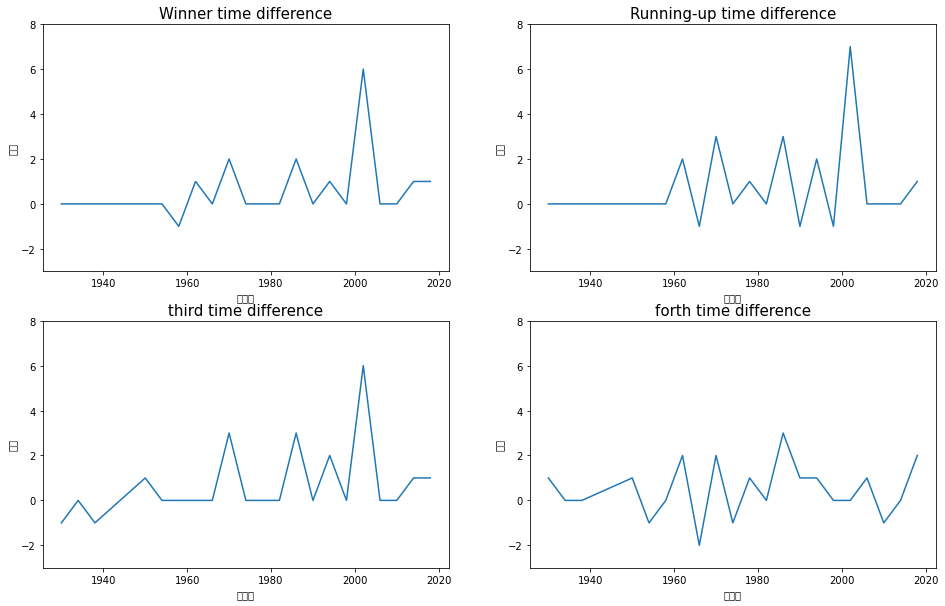

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
plt.plot(timeset2['year'],timeset2['timedif1'])
plt.title('Winner time difference', size=15)
plt.ylim([-3,8])
plt.xlabel('개최국')
plt.ylabel('시차')
plt.subplot(2,2,2)
plt.plot(timeset2['year'],timeset2['timedif2'])
plt.title('Running-up time difference', size=15)
plt.ylim([-3,8])
plt.xlabel('개최국')
plt.ylabel('시차')
plt.subplot(2,2,3)
plt.plot(timeset2['year'],timeset2['timedif3'])
plt.title('third time difference', size=15)
plt.ylim([-3,8])
plt.xlabel('개최국')
plt.ylabel('시차')
plt.subplot(2,2,4)
plt.plot(timeset2['year'],timeset2['timedif4'])
plt.title('forth time difference', size=15)
plt.ylim([-3,8])
plt.xlabel('개최국')
plt.ylabel('시차')